# <center> 2D Image Augmentation With Keras

# What is data augmentation?
Data augmentation encompasses a wide range of techniques used to generate “new” training samples from the original ones by applying random jitters and perturbations (but at the same time ensuring that the class labels of the data are not changed).

#### This is an overview of image augmentation in keras.

In [15]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img

Here, <b>ImageDataGenerator</b> is used to specify the parameters like rotation, zoom, width we will be using to generate images, more of which will be covered later. <b>img_to_array </b>is used to convert the given image to a numpy array which will be used by the <b>ImageDataGenerator</b>, <b>load_img</b> will be used to load the image to modify into our program.

In [23]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Arguments:
We have used <b>ImageDataGenerator() </b>here to specify the parameters for generating our image, which can be explained as follows:
* <b>rotation_range </b>: amount of rotation
* <b> width_shift_range </b>, <b>height_shift_range </b>: amount of shift in width, height
* <b>shear_range </b>: shear angle in counter-clockwise direction as radians
* <b>zoom_range </b>: range for random zoom
* <b>horizontal_flip </b>: Boolean (True or False). Randomly flip inputs horizontally
* <b>fill_mode </b>: One of {“constant”, “nearest”, “reflect” or “wrap”}. Points outside the boundaries of the input are filled according to the given mode

After specifying the parameters and storing them in datagen variable, we move towards importing our image.

In [24]:
img = load_img('flower.jpg')

Here, I am using a flower image, you can simply use your own sample image.

In [27]:
x = img_to_array(img)  # creating a Numpy array with shape (1050, 1400, 3)
x.shape

(1050, 1400, 3)

In [28]:
x = x.reshape((1,) + x.shape)  # converting to a Numpy array with shape (1, 1050, 1400, 3)

In [31]:
x.shape

(1, 1050, 1400, 3)

<b> load_img </b> is used to load the required image, you can use any image you like but I would recommend an image with a face like that of a cat, a dog or a human!

Next, we use <b>img_to_array </b>to convert the image to something numerical, in this case, a numpy array, which can be easily fed into our flow() function (don’t worry it is explained later!). We store our converted numpy array to a variable x.

Then, we have to reshape the numpy array, adding another parameter of size 1. We do so in order to make it a numpy array of order 4 instead of order 3, to accommodate a parameter called channels axis. In the case of grayscale data, the channels axis should have value 1, and in the case of RGB data, it should have value 3.

This is my input image (a flower):


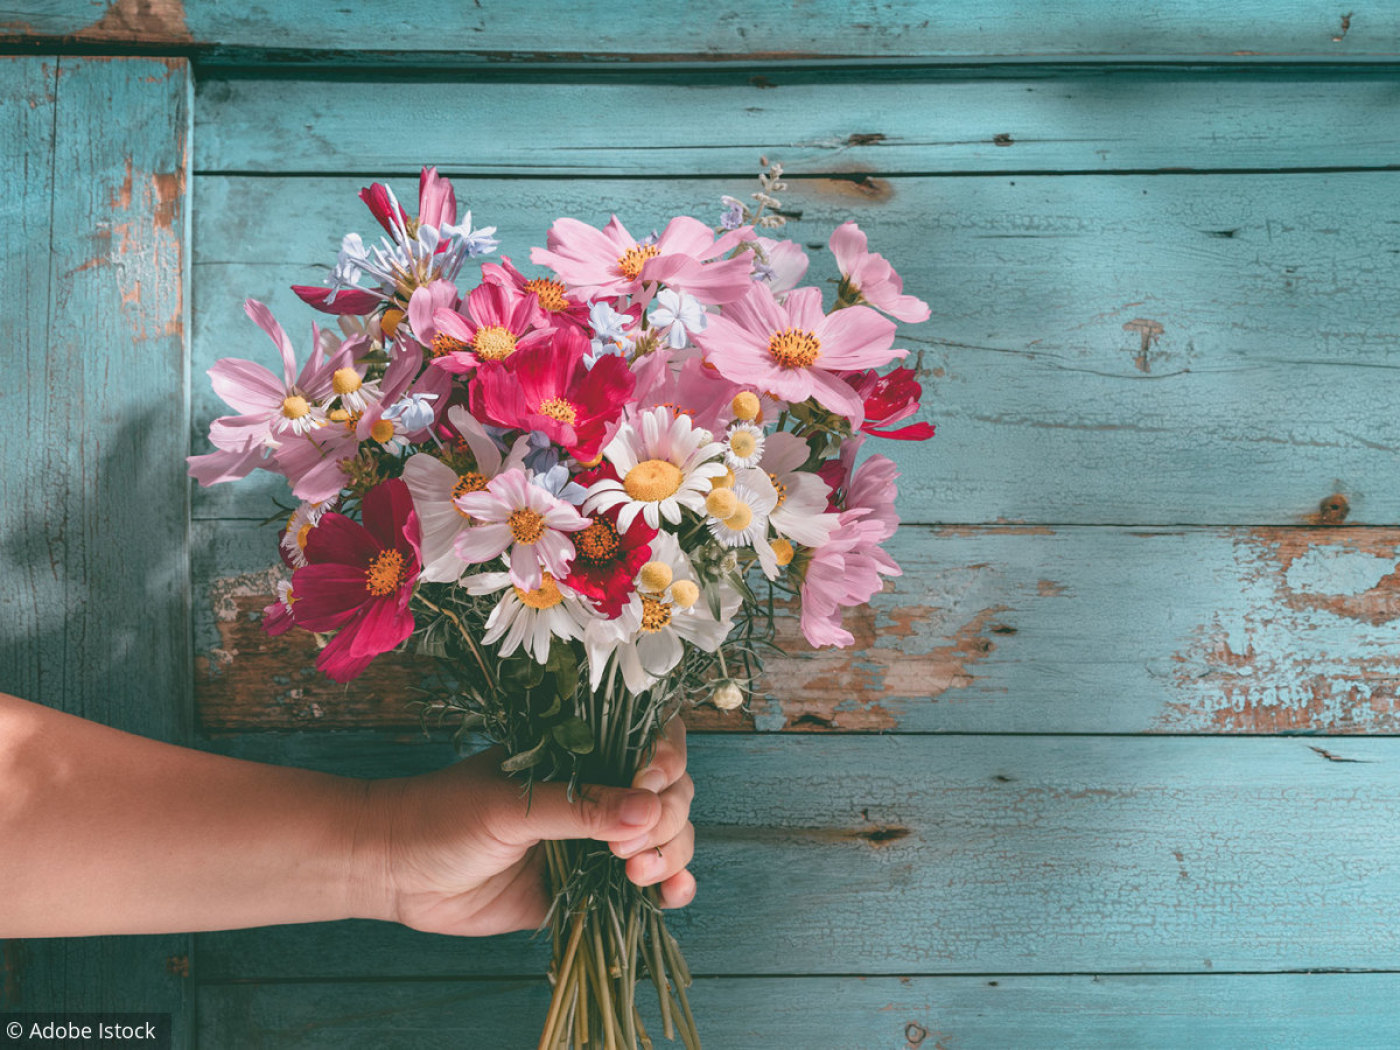

In [19]:
from IPython.display import Image
Image(filename='flower.jpg')

# Output:
Now that we have our input in form, let’s start producing some output.

In [20]:
i = 0
for batch in datagen.flow(x,save_to_dir='output', save_prefix='flower', save_format='jpeg'):
    i += 1
    if i > 20:
        break

we use <b>datatgen.flow() </b>function in each iteration. We have given <b>x– </b>the numpy array for the input image, <b>save_to_dir– </b>the directory to save output, <b>save_prefix–</b> the prefix for the names of the images and <b>save_format– </b>the image format as input.

This is how our output images will look like:


In [21]:
#Image(filename='flower_result.jpg')

Notice that each image is a bit different from the other due to zoom, rotation, width or height shift etc. This will help the model you will be building to recognize a large number of images, thus making it more efficient.